Implementing **Random Forest Classifier** on Position salaries and Iris dataset

In [1]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

In [2]:
# for confusion matrix

def plot_confusion_matrix(cm, classes, normalize = False, title='Confusion matrix', cmap = plt.cm.Blues):
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment = "center", 
                 color = "white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Position salaries

In [3]:
data = pd.read_csv(r'E:\Jupyterfiles\ML_practice\Position_Salaries.csv')
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
data.shape

(10, 3)

In [5]:
X = data.iloc[:, 1: -1].values
Y = data.iloc[:, -1].values

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

## Classifier with entropy

In [7]:
clf = RandomForestClassifier(criterion = 'entropy')
clf.fit(X, Y)

RandomForestClassifier(criterion='entropy')

In [8]:
clf_predict = clf.predict(X_test)

### Evaluation of classifier

#### Confusion Matrix

Confusion matrix, without normalization
[[1 0]
 [0 1]]


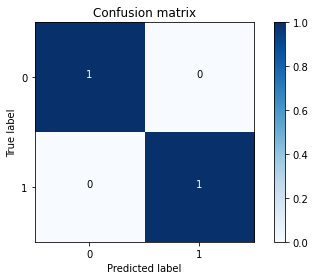

In [9]:
clf_cm = confusion_matrix(Y_test, clf_predict)

plot_confusion_matrix(clf_cm, [0, 1])
plt.show()

#### Accuracy

In [10]:
print('Accuracy score: ', accuracy_score(Y_test, clf_predict))
print('Classification report: ')
print(classification_report(Y_test, clf_predict))

Accuracy score:  1.0
Classification report: 
              precision    recall  f1-score   support

       60000       1.00      1.00      1.00         1
      500000       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



### Making prediction at 86

In [11]:
clf.predict([[86]])

array([1000000], dtype=int64)

## Classifier with ginni as criterion

In [12]:
clf = RandomForestClassifier()
clf.fit(X, Y)

RandomForestClassifier()

In [13]:
clf_predict = clf.predict(X_test)

### Evaluation of classifier

#### Confusion matrix

Confusion matrix, without normalization
[[1 0]
 [0 1]]


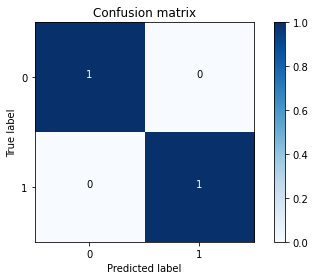

In [14]:
clf_cm = confusion_matrix(Y_test, clf_predict)

plot_confusion_matrix(clf_cm, [0, 1])
plt.show()

#### Accuracy and classification score

In [15]:
print('Accuracy score: ', accuracy_score(Y_test, clf_predict))
print('Classification report: ')
print(classification_report(Y_test, clf_predict))

Accuracy score:  1.0
Classification report: 
              precision    recall  f1-score   support

       60000       1.00      1.00      1.00         1
      500000       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



### Making prediction at 86

In [16]:
clf.predict([[86]])

array([1000000], dtype=int64)

# Iris

In [17]:
data = pd.read_csv(r'E:\Jupyterfiles\ML_practice\Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.fit_transform(X_test)

## Classifier with 'Entropy' criterion

In [20]:
rf_clf = RandomForestClassifier(criterion = 'entropy')
rf_clf.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy')

In [21]:
rf_predict = rf_clf.predict(X_test)

### Evaluation of classifier

#### Confusion matrix

Confusion matrix, without normalization
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


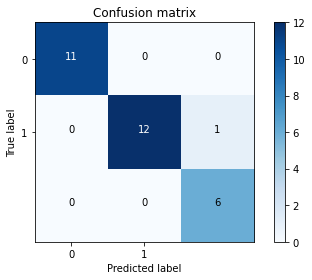

In [22]:
rf_cm = confusion_matrix(Y_test, rf_predict)

plot_confusion_matrix(rf_cm, [0, 1])
plt.show()

#### Accuracy

In [23]:
print('Accuracy score: ', accuracy_score(Y_test, rf_predict))
print('Classification report: ')
print(classification_report(Y_test, rf_predict))

Accuracy score:  0.9666666666666667
Classification report: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



## Classifier with 'Gini' as criteria

In [24]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, Y_train)

RandomForestClassifier()

In [25]:
rf_predict = rf_clf.predict(X_test)

### Evaluation of classifier

#### Confusion matrix

Confusion matrix, without normalization
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


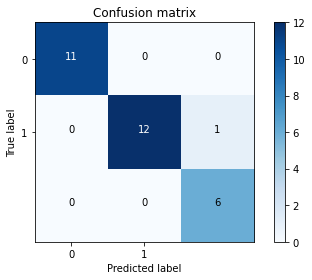

In [26]:
rf_cm = confusion_matrix(Y_test, rf_predict)

plot_confusion_matrix(rf_cm, [0, 1])
plt.show()

#### Accuracy

In [27]:
print('Accuracy score: ', accuracy_score(Y_test, rf_predict))
print('Classification report: ')
print(classification_report(Y_test, rf_predict))

Accuracy score:  0.9666666666666667
Classification report: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

